In [1]:
import pickle
import pandas as pd
#df = pd.read_csv("Data/1data_w_features.csv", encoding = 'unicode_escape')
#df = pd.read_pickle("./1collapsed_allcompanies_withFeatures.pkl")
df = pd.read_pickle("./1data_w_features.pkl")


In [25]:
df.columns

Index(['company', 'cons', 'Overall', 'Paid Time Off', 'Ability Telecommute',
       'Flexible Hours', 'Social Environment', 'Coworkers',
       'Wellness Initiatives', 'Mentorship', 'Maternity Leave',
       'Family Growth Support', 'Employer Responsiveness',
       'Learning Opportunities', 'Management Opportunities',
       'Equal Opportunities', 'Salary Satisfaction',
       'Female Representation in Leadership', 'Number of Ratings', 'pros',
       'advice_to_management', 'overall_rating', 'Career Opportunities',
       'Compensation and Benefits', 'Culture & Values', 'Work/Life Balance',
       'con_scores', 'cons_compound', 'cons_negative', 'cons_positive',
       'pro_scores', 'pros_compound', 'pros_negative', 'pros_positive',
       'cons_cleaned', 'cons_lemmats', 'pros_cleaned', 'pros_lemmats',
       'con_lda_0', 'con_lda_1', 'con_lda_2', 'Cons Topic', 'Pros Topic',
       'pro_lda_0', 'pro_lda_1', 'pro_lda_2', 'Parsed_cons',
       'con_work_life_bal', 'con_equality', 'con_ge

In [26]:
df_labeled = df[pd.notnull(df['Overall'])]
df_labeled.index = range(len(df_labeled.index)) #reset index

In [27]:
#companies that do not have reviews on inhersight.com
df_unlabeled = df[pd.isnull(df['Overall'])]
df_unlabeled.index = range(len(df_unlabeled.index)) #reset index

In [28]:
df_labeled["Pros Topic"] = df_labeled["Pros Topic"].astype('category')
df_labeled['Cons Topic'] = df_labeled['Cons Topic'].astype('category')
df_unlabeled["Pros Topic"] = df_unlabeled["Pros Topic"].astype('category')
df_unlabeled['Cons Topic'] = df_unlabeled['Cons Topic'].astype('category')

/Applications/anaconda3/envs/joyiscool/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/envs/joyiscool/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Applications/anaconda3/envs/joyiscool/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [29]:
X_all = df[['PCA_0', 'PCA_1', 'PCA_2', "PCA_3" ,'PCA_4']]
X = df_labeled[['PCA_0', 'PCA_1', 'PCA_2', "PCA_3", 'PCA_4']]

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np

y = df_labeled['Equal Opportunities']
X = df_labeled[['PCA_0', 'PCA_1', 'PCA_2', "PCA_3", 'PCA_4']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42)
def RFR_error(y_train, X_train, X_test, y_test, rfr):
    rfr.fit(X_train, y_train) #fit on the training data
    y_pred = rfr.predict(X_test) #get predicted values for all companies including those not ranked on inhersight
    errors = abs(y_pred - y_test)
    MAE = round(np.mean(errors), 2)
    MSE = round(np.mean((y_test - y_pred)**2), 2)
    
    return MAE, MSE
    
    
from sklearn.model_selection import cross_val_predict



rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42)
def RFR_error(y_train, X_train, X_test, y_test, rfr):
    rfr.fit(X_train, y_train) #fit on the training data
    y_pred = rfr.predict(X_test) #get predicted values for all companies including those not ranked on inhersight
    errors = abs(y_pred - y_test)
    MAE = round(np.mean(errors), 2)
    MSE = round(np.mean((y_test - y_pred)**2), 2)
    #fig, ax = plt.subplots()
    #ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    #ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    #ax.set_xlabel('Actual')
    #ax.set_ylabel('Predicted')
    #ax.set_title("Actual vs Predicted")
    #plt.show()
    return MAE, MSE
    

In [31]:
df_labeled.columns

Index(['company', 'cons', 'Overall', 'Paid Time Off', 'Ability Telecommute',
       'Flexible Hours', 'Social Environment', 'Coworkers',
       'Wellness Initiatives', 'Mentorship', 'Maternity Leave',
       'Family Growth Support', 'Employer Responsiveness',
       'Learning Opportunities', 'Management Opportunities',
       'Equal Opportunities', 'Salary Satisfaction',
       'Female Representation in Leadership', 'Number of Ratings', 'pros',
       'advice_to_management', 'overall_rating', 'Career Opportunities',
       'Compensation and Benefits', 'Culture & Values', 'Work/Life Balance',
       'con_scores', 'cons_compound', 'cons_negative', 'cons_positive',
       'pro_scores', 'pros_compound', 'pros_negative', 'pros_positive',
       'cons_cleaned', 'cons_lemmats', 'pros_cleaned', 'pros_lemmats',
       'con_lda_0', 'con_lda_1', 'con_lda_2', 'Cons Topic', 'Pros Topic',
       'pro_lda_0', 'pro_lda_1', 'pro_lda_2', 'Parsed_cons',
       'con_work_life_bal', 'con_equality', 'con_ge

In [32]:
y_list = ['Overall', 'Paid Time Off',
       'Ability Telecommute', 'Flexible Hours', 'Social Environment',
       'Coworkers', 'Wellness Initiatives', 'Mentorship', 'Maternity Leave',
       'Family Growth Support',
       'Learning Opportunities', 'Management Opportunities',
       'Equal Opportunities', 'Salary Satisfaction',
       'Female Representation in Leadership'] 
MAE_scores = []
MSE_scores = []
for topic in y_list:
    y = df_labeled[topic]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    MAE_error, MSE_error = RFR_error(y_train, X_train, X_test, y_test, rfr)
    MAE_scores.append(MAE_error)
    MSE_scores.append(MSE_error)

In [15]:
MAE_scores

[0.45,
 0.53,
 0.63,
 0.69,
 0.6,
 0.4,
 0.83,
 0.62,
 0.64,
 0.67,
 0.57,
 0.58,
 0.66,
 0.59,
 0.72]

In [16]:
MSE_scores

[0.32,
 0.48,
 0.55,
 0.62,
 0.61,
 0.34,
 1.22,
 0.58,
 0.54,
 0.72,
 0.47,
 0.54,
 0.66,
 0.49,
 0.83]

In [20]:
y = df_labeled['Mentorship']
X = df_labeled[['PCA_0', 'PCA_1', 'PCA_2', "PCA_3", 'PCA_4']]

rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rfr.fit(X, y) #fit on the training data
y_pred = rfr.predict(X)

AttributeError: 'JointGrid' object has no attribute 'set_title'

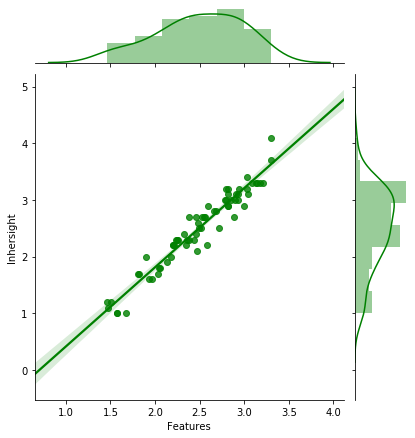

In [23]:
import seaborn as sns
%matplotlib inline
ax=sns.jointplot(y_pred, df_labeled['Mentorship'],color="g",kind="reg")
ax.ax_joint.set_xlabel('Features')
ax.ax_joint.set_ylabel('Inhersight')
ax.set_title('Mentorship Opportunities')

In [21]:
#remove variables with high errors
y_list = ['Overall', 'Paid Time Off',
       'Flexible Hours',  'Social Environment',
       'Coworkers', 'Mentorship', 'Maternity Leave',
       'Family Growth Support',
       'Learning Opportunities', 'Management Opportunities',
       'Equal Opportunities', 'Salary Satisfaction'] 
MAE_scores = []
MSE_scores = []
for topic in y_list:
    y = df_labeled[topic]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    MAE_error, MSE_error = RFR_error(y_train, X_train, X_test, y_test, rfr)
    MAE_scores.append(MAE_error)
    MSE_scores.append(MSE_error)

In [22]:
MAE_scores

[0.45, 0.53, 0.63, 0.6, 0.4, 0.62, 0.64, 0.67, 0.57, 0.58, 0.66, 0.59]

In [23]:
MSE_scores

[0.32, 0.48, 0.55, 0.61, 0.34, 0.58, 0.54, 0.72, 0.47, 0.54, 0.66, 0.49]

In [33]:
#remove additional topics not that interesting
y_list = ['Paid Time Off','Flexible Hours', 'Mentorship', 'Maternity Leave',
       'Learning Opportunities', 'Management Opportunities','Salary Satisfaction'] 
MAE_scores = []
MSE_scores = []
for topic in y_list:
    y = df_labeled[topic]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
    MAE_error, MSE_error = RFR_error(y_train, X_train, X_test, y_test, rfr)
    MAE_scores.append(MAE_error)
    MSE_scores.append(MSE_error)

In [34]:
MAE_scores

[0.53, 0.69, 0.62, 0.64, 0.57, 0.58, 0.59]

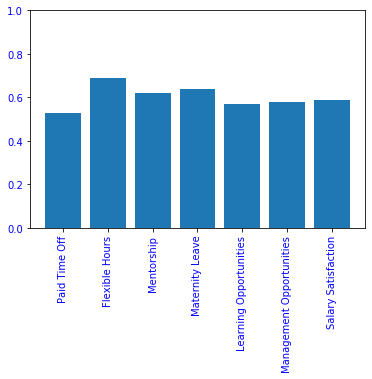

In [38]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# Choose the height of the bars
height = MAE_scores
 
# Choose the names of the bars
bars = y_list
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, color='blue')
plt.yticks(color='blue')
plt.xticks(y_pos, bars, rotation=90)
plt.ylim([0, 1])
# Show graphic
plt.show()


In [33]:
MSE_scores

[0.48, 0.62, 0.58, 0.54, 0.47, 0.54, 0.49]

In [34]:
rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42)
def RFR_model(y, X, X_all, rfr):
    rfr.fit(X, y) #fit on the training data
    y_pred_all = rfr.predict(X_all) #get predicted values for all companies including those not ranked on inhersight
    return y_pred_all

In [43]:
y_list = ['Paid Time Off','Flexible Hours', 'Mentorship', 'Maternity Leave',
       'Learning Opportunities', 'Management Opportunities','Salary Satisfaction'] 
for topic in y_list:
    y = df_labeled[topic]
    predicted_vals = RFR_model(y, X, X_all, rfr)
    df[topic + '_predicted'] = predicted_vals

In [41]:
df.head()

,company,cons,Overall,Paid Time Off,Ability Telecommute,Flexible Hours,Social Environment,Coworkers,Wellness Initiatives,Mentorship,...,PCA_3,PCA_4,Paid Time Off_predicted,Ability Telecommute_predicted,Mentorship_predicted,Maternity Leave_predicted,Learning Opportunities_predicted,Management Opportunities_predicted,Salary Satisfaction_predicted,Flexible Hours_predicted
0,360Training,The most tenure someone has there that is not ...,1.9,2.2,2.8,3.0,2.4,2.0,1.8,1.2,...,-0.256282,0.205550,2.5963,2.7376,1.5016,2.4945,1.9987,2.1437,1.9206,2.8750
1,3m,Modernization of lab buildings as they are vas...,3.3,3.7,3.0,3.2,2.7,3.4,3.7,3.0,...,-0.068835,-0.173514,3.8374,3.1305,2.8565,3.9111,3.2311,3.2905,3.3885,3.3429
2,AMD,the usual cons - slow to execute I didn't feel...,3.6,4.0,3.6,4.0,3.3,3.9,3.4,2.7,...,-0.092795,-0.250009,4.0050,3.4609,2.5577,3.4283,3.3290,3.3660,3.0418,3.8940
3,AT&T,Lack of training in product. Customers suffer...,2.9,3.4,2.1,2.3,2.2,3.2,2.2,2.7,...,0.211781,0.356156,3.4641,2.5361,2.5241,3.4144,2.9396,3.3154,3.0178,2.6275
4,Accruent,Don't expect to get paid well and there has be...,3.2,4.6,4.0,4.0,3.9,3.8,3.6,3.2,...,-0.052986,-0.030369,4.3262,3.7198,2.8162,3.2338,2.6217,2.6802,2.0234,3.8111


In [42]:
df.columns

Index(['company', 'cons', 'Overall', 'Paid Time Off', 'Ability Telecommute',
       'Flexible Hours', 'Social Environment', 'Coworkers',
       'Wellness Initiatives', 'Mentorship', 'Maternity Leave',
       'Family Growth Support', 'Employer Responsiveness',
       'Learning Opportunities', 'Management Opportunities',
       'Equal Opportunities', 'Salary Satisfaction',
       'Female Representation in Leadership', 'Number of Ratings', 'pros',
       'advice_to_management', 'overall_rating', 'Career Opportunities',
       'Compensation and Benefits', 'Culture & Values', 'Work/Life Balance',
       'con_scores', 'cons_compound', 'cons_negative', 'cons_positive',
       'pro_scores', 'pros_compound', 'pros_negative', 'pros_positive',
       'cons_cleaned', 'cons_lemmats', 'pros_cleaned', 'pros_lemmats',
       'con_lda_0', 'con_lda_1', 'con_lda_2', 'Cons Topic', 'Pros Topic',
       'pro_lda_0', 'pro_lda_1', 'pro_lda_2', 'Parsed_cons',
       'con_work_life_bal', 'con_equality', 'con_ge

In [45]:
df2 = df[['company','Overall', 'Paid Time Off', 'Ability Telecommute',
       'Flexible Hours', 'Social Environment', 'Coworkers',
       'Wellness Initiatives', 'Mentorship', 'Maternity Leave',
       'Family Growth Support', 'Employer Responsiveness',
       'Learning Opportunities', 'Management Opportunities',
       'Equal Opportunities', 'Salary Satisfaction',
       'Female Representation in Leadership', 'Number of Ratings','overall_rating', 'Career Opportunities',
       'Compensation and Benefits', 'Culture & Values', 'Work/Life Balance','PCA_0', 'PCA_1',
       'PCA_2', 'PCA_3', 'PCA_4', 'Paid Time Off_predicted',
       'Flexible Hours_predicted', 'Mentorship_predicted',
       'Maternity Leave_predicted', 'Learning Opportunities_predicted',
       'Management Opportunities_predicted', 'Salary Satisfaction_predicted']]

In [46]:
df2

,company,Overall,Paid Time Off,Ability Telecommute,Flexible Hours,Social Environment,Coworkers,Wellness Initiatives,Mentorship,Maternity Leave,...,PCA_2,PCA_3,PCA_4,Paid Time Off_predicted,Flexible Hours_predicted,Mentorship_predicted,Maternity Leave_predicted,Learning Opportunities_predicted,Management Opportunities_predicted,Salary Satisfaction_predicted
0,360Training,1.9,2.2,2.8,3.0,2.4,2.0,1.8,1.2,2.5,...,-0.066337,-0.256282,0.205550,2.5963,2.8750,1.5016,2.4945,1.9987,2.1437,1.9206
1,3m,3.3,3.7,3.0,3.2,2.7,3.4,3.7,3.0,3.8,...,-0.024297,-0.068835,-0.173514,3.8374,3.3429,2.8565,3.9111,3.2311,3.2905,3.3885
2,AMD,3.6,4.0,3.6,4.0,3.3,3.9,3.4,2.7,3.3,...,-0.009480,-0.092795,-0.250009,4.0050,3.8940,2.5577,3.4283,3.3290,3.3660,3.0418
3,AT&T,2.9,3.4,2.1,2.3,2.2,3.2,2.2,2.7,3.2,...,0.175923,0.211781,0.356156,3.4641,2.6275,2.5241,3.4144,2.9396,3.3154,3.0178
4,Accruent,3.2,4.6,4.0,4.0,3.9,3.8,3.6,3.2,3.2,...,-0.649309,-0.052986,-0.030369,4.3262,3.8111,2.8162,3.2338,2.6217,2.6802,2.0234
5,Adobe,3.7,4.5,3.7,4.0,3.5,3.5,4.0,3.2,4.4,...,-0.049135,-0.072134,-0.377157,4.2419,3.8111,3.0322,4.0771,3.2414,3.2233,3.4206
6,Amazon,3.0,3.5,2.3,2.5,2.6,3.3,2.1,2.5,3.8,...,0.701123,0.944195,0.706963,3.5637,2.8294,2.5164,3.9378,3.0794,3.2853,2.9777
7,Apple,3.5,3.9,2.5,2.7,3.0,4.0,4.0,2.7,4.3,...,-0.021498,0.092330,-0.119695,3.9930,3.0228,2.8905,4.2477,3.3935,3.4944,3.2996
8,Applied Materials,2.5,2.5,2.8,2.5,2.1,2.8,3.6,1.7,2.9,...,0.519744,0.931710,-0.396582,2.9213,2.5832,1.8150,2.7693,2.5822,2.5342,2.3355
9,Arm Holdings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.078234,0.104100,-0.553106,3.8389,3.3938,2.8464,3.4364,3.1701,3.1306,3.1825


In [47]:

df2.to_csv('1companyScoresDf.csv')

In [39]:
#training error
#remove additional topics not that interesting

rfr = RandomForestRegressor(n_estimators = 1000, random_state = 42)
def RFR_error(y, X, rfr):
    rfr.fit(X, y) #fit on the training data
    y_pred = rfr.predict(X) #get predicted values for all companies including those not ranked on inhersight
    errors = abs(y_pred - y)
    MAE = round(np.mean(errors), 2)
    MSE = round(np.mean((y - y_pred)**2), 2)
    #fig, ax = plt.subplots()
    #ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    #ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    #ax.set_xlabel('Actual')
    #ax.set_ylabel('Predicted')
    #ax.set_title("Actual vs Predicted")
    #plt.show()
    return MAE, MSE
y_list = ['Paid Time Off','Flexible Hours', 'Mentorship', 'Maternity Leave',
       'Learning Opportunities', 'Management Opportunities','Salary Satisfaction'] 
MAE_scores = []
MSE_scores = []
for topic in y_list:
    y = df_labeled[topic]
    X = df_labeled[['PCA_0', 'PCA_1', 'PCA_2', "PCA_3", 'PCA_4']]
    MAE_error, MSE_error = RFR_error(y, X, rfr)
    MAE_scores.append(MAE_error)
    MSE_scores.append(MSE_error)

In [40]:
MAE_scores

[0.18, 0.23, 0.21, 0.21, 0.21, 0.21, 0.2]

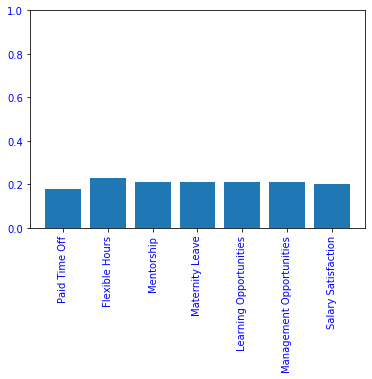

In [41]:
# Choose the height of the bars
height = MAE_scores
 
# Choose the names of the bars
bars = y_list
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars, color='blue')
plt.yticks(color='blue')
plt.xticks(y_pos, bars, rotation=90)
plt.ylim([0, 1])
# Show graphic
plt.show()

# trying alternative models below, don't run

## tuning

In [109]:
############### Start: Randomized Search CV ##################################

# Look at parameters used by our current forest
# from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Randomized Search CV

# Number of trees in random forest
n_estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5,25,50,75, 100, 125]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

param_grid = {'bootstrap': [True],
              'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}
{'bootstrap': [True], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 25, 50, 75, 100, 125], 'min_samples_split': [2, 5, 10, 15], 'min_samples_leaf': [1, 2, 5, 10]}


In [110]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [111]:
y = df_labeled['Paid Time Off']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 22.1min finished
/Applications/anaconda3/envs/joyiscool/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter 

{'bootstrap': True,
 'max_depth': 75,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 200}

In [113]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
MSE of:  0.7018370105865356


In [117]:
base_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
MSE of:  0.7097022348660881


In [118]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of -1.11%.


## gradient boosting

In [121]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error

from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model = ensemble.GradientBoostingRegressor(**params)

model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [122]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(X_train,y_train)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('R2 sq: ',model_score)
y_predicted = model.predict(X_test)


R2 sq:  0.9933902705602009


In [125]:
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predicted))
#same error as my random forest

Mean squared error: 0.53


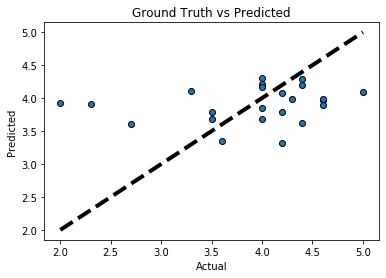

In [126]:
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

## ridge and lasso

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)


linear regression train score: 0.23101519904744663
linear regression test score: -0.023174828817949633
ridge regression train score low alpha: 0.2310151251088055
ridge regression test score low alpha: -0.023206761641887175
ridge regression train score high alpha: 0.13462199608264225
ridge regression test score high alpha: -0.033724014149158155


In [140]:
lr_pred = lr.predict(X_test)
rr_pred = rr.predict(X_test)
rr100_pred = rr100.predict(X_test)
error_lr = abs(lr_pred - y_test)
error_rr = abs(rr_pred - y_test)
error_rr100 = abs(rr100_pred - y_test)

lr_MAE = round(np.mean(error_lr), 2)
rr_MAE = round(np.mean(error_rr), 2)

rr100_MAE = round(np.mean(error_rr100), 2)  

print("lnear reg MAE:", lr_MAE)
print("ridge gression low alpha MAE:", rr_MAE)
print("ridge reg high alpha MAE:", rr100_MAE)

lnear reg MAE: 0.75
ridge gression low alpha MAE: 0.75
ridge reg high alpha MAE: 0.78


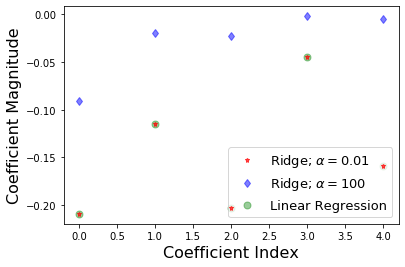

In [133]:
plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()

training score: 0.0
test score:  -0.04816718569341938
number of features used:  0
training score for alpha=0.01: 0.22592214380488163
test score for alpha =0.01:  -0.032937210361239755
number of features used: for alpha =0.01: 4
training score for alpha=0.0001: 0.2310144091675671
test score for alpha =0.0001:  -0.02318567219080725
number of features used: for alpha =0.0001: 5
LR training score: 0.23101519904744663
LR test score:  -0.023174828817949633


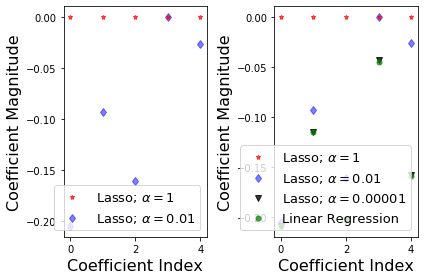

In [143]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score)
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print( "training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print( "LR training score:", lr_train_score )
print ("LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()

### Building the recommender

In [12]:
df = pd.read_csv('1companyScoresDf.csv')

df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,company,cons,Overall,Paid Time Off,...,PCA_2,PCA_3,PCA_4,Mentorship_predicted,Paid Time Off_predicted,Flexible Hours_predicted,Maternity Leave_predicted,Learning Opportunities_predicted,Salary Satisfaction_predicted,Management Opportunities_predicted
0,0,0,0,0,0,0,360Training,The most tenure someone has there that is not...,1.9,2.2,...,-0.234096,-0.622337,0.060857,1.5851,2.7484,3.0982,2.5510,2.1307,2.0190,2.2018
1,1,1,1,1,1,1,3m,Modernization of lab buildings as they are va...,3.3,3.7,...,-0.327434,-0.195602,-0.267828,2.8101,3.7766,3.3209,3.8369,3.1840,3.2829,3.3035
2,2,2,2,2,2,2,AMD,the usual cons - slow to exe...,3.6,4.0,...,-0.251707,0.054362,-0.170688,2.6668,3.9539,3.7504,3.3942,3.3918,3.1882,3.3439
3,3,3,3,3,3,3,AT&T,Lack of training in product. Customers suffe...,2.9,3.4,...,-0.456122,-0.132771,0.384368,2.5375,3.5333,2.5572,3.4624,2.9482,3.1779,3.3385
4,4,4,4,4,4,4,Accruent,Don't expect to get paid well and there has b...,3.2,4.6,...,0.029613,0.036600,-0.273618,2.7785,4.3443,3.7080,3.2713,2.6173,1.9166,2.7857
5,5,5,5,5,5,5,Adobe,There are no cons to working at Ad...,3.7,4.5,...,-0.286103,-0.139433,-0.437309,3.0028,4.2589,3.7219,4.2239,3.3315,3.7558,3.2652
6,6,6,6,6,6,6,Amazon,Long hours and high expectations are the norm...,3.0,3.5,...,-0.111457,0.595279,0.613543,2.5639,3.6003,2.6476,3.9272,3.1597,3.0299,3.3521
7,7,7,7,7,7,7,Apple,things are changing so fast within Apple. Now...,3.5,3.9,...,-0.312041,-0.105535,-0.191276,2.7644,3.8367,3.0007,4.1928,3.2360,3.1827,3.4552
8,8,8,8,8,8,8,Applied Materials,Horrible autocratic management and arbitrary ...,2.5,2.5,...,0.071167,1.026943,0.161493,1.6699,2.8586,2.4201,2.6822,2.5501,2.2246,2.4481
9,9,9,9,9,9,9,Arm Holdings,"Nothing major that I have come across, so ...",NaN,NaN,...,0.115267,0.347744,-0.288264,2.7189,4.1353,3.5045,3.2226,3.0448,3.0529,2.8611


In [13]:
#scale the company values
data = df[['Mentorship_predicted',
           'Management Opportunities_predicted',
           'Maternity Leave_predicted',
           'Learning Opportunities_predicted',
           'Salary Satisfaction_predicted',
          'Paid Time Off', 
           'Flexible Hours']]
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler.fit(data)
#normed = scaler.transform(data)

In [14]:
data.head(5)

,Mentorship_predicted,Management Opportunities_predicted,Maternity Leave_predicted,Learning Opportunities_predicted,Salary Satisfaction_predicted,Paid Time Off,Flexible Hours
0,1.5851,2.2018,2.5510,2.1307,2.0190,2.2,3.0
1,2.8101,3.3035,3.8369,3.1840,3.2829,3.7,3.2
2,2.6668,3.3439,3.3942,3.3918,3.1882,4.0,4.0
3,2.5375,3.3385,3.4624,2.9482,3.1779,3.4,2.3
4,2.7785,2.7857,3.2713,2.6173,1.9166,4.6,4.0


### fake user input

In [62]:
#write a function to scale user input

#user_rankings = np.array([5, 5, 5, 5, 5])
#def scale_rankings(rankings, data, num_categories):
#    user_rankings_transformed = (rankings/num_categories)*(data.max()-data.min())+data.min()
#    return user_rankings_transformed


In [63]:
#from scipy import spatial
#def get_similarity(data, rankings):
#    distances = []
#    for index, row in data.iterrows():
#        distances.append((1 - spatial.distance.cosine(rankings, row.values)))
#    idx = sorted(range(len(distances)), key=lambda i: distances[i], reverse=False)
#    return idx, distances    

In [12]:
#user = np.array([5, 3, 2, 5, 0]) # it's a score out of 5
#user_transformed = (user/5)*(data.max()-data.min())+data.min()

In [61]:
#indices, dists = get_similarity(data, user_transformed)
#indices[:3]

In [60]:
#indices, distance = get_similarity(data, user_rankings_transformed)

### matching with companies

In [59]:
#user1 = np.array([1, 3, 2, 2, 5]) # it's a score out of 5
#user1_transformed = (user1/5)*(data.max()-data.min())+data.min()
#indices, dists = get_similarity(data, user1_transformed)
#indices[:3]

In [66]:
#def return_company_name(company_column, ranking_index):
#    first_rec = df['company'][ranking_index[0]]
#    second_rec = df['company'][ranking_index[1]]
#    third_rec = df['company'][ranking_index[2]]
#    return first_rec, second_rec, third_rec
    

In [67]:
#first, second, third = return_company_name(df['company'], indices)

# to do:

reduce the dataset for reccomendations for companies that are above average? these rec. companies are not ranked very high...

In [42]:
#another way to match, use weights instead of cosine
rankings = [7/28, 6/28, 5/28, 4/28, 3/28, 2/28, 1/28]

In [43]:
sum(rankings)

1.0

In [44]:
data = df[['Mentorship_predicted',
           'Management Opportunities_predicted',
           'Maternity Leave_predicted',
           'Learning Opportunities_predicted',
           'Salary Satisfaction_predicted',
          'Paid Time Off', 
           'Flexible Hours']]

In [45]:

for index, col in enumerate(data):
    #print(col)
    weighted = data.iloc[:,index].values * rankings[index]
    data[categories[index] + '_weighted'] = weighted

/Applications/anaconda3/envs/joyiscool/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [47]:
data

,Mentorship_predicted,Management Opportunities_predicted,Maternity Leave_predicted,Learning Opportunities_predicted,Salary Satisfaction_predicted,Paid Time Off,Flexible Hours,Mentorship Opportunities_weighted,Management Opportunities_weighted,Maternity Leave_weighted,Learning Opportunities_weighted,Salary Satisfaction_weighted,Paid Time Off_weighted,Flexible Hours_weighted
0,1.4114,2.1109,2.5734,2.2912,1.9227,2.2,3.0,0.352850,0.452336,0.459536,0.327314,0.206004,0.157143,0.107143
1,2.7749,2.8291,3.1204,2.6663,1.8849,4.6,4.0,0.693725,0.606236,0.557214,0.380900,0.201954,0.328571,0.142857
2,2.7185,3.3588,3.9486,3.1172,3.1011,3.5,2.5,0.679625,0.719743,0.705107,0.445314,0.332261,0.250000,0.089286
3,2.6156,3.4382,3.9940,3.0752,3.0833,3.9,2.7,0.653900,0.736757,0.713214,0.439314,0.330354,0.278571,0.096429
4,2.8030,3.3024,4.3288,2.7450,3.3519,4.0,3.7,0.700750,0.707657,0.773000,0.392143,0.359132,0.285714,0.132143
5,2.5439,3.9166,4.0370,3.8920,2.7788,4.0,2.0,0.635975,0.839271,0.720893,0.556000,0.297729,0.285714,0.071429
6,2.3073,3.6042,3.9099,2.3145,2.9356,4.3,3.9,0.576825,0.772329,0.698196,0.330643,0.314529,0.307143,0.139286
7,2.4117,3.5229,3.6750,2.6824,3.0686,4.1,3.2,0.602925,0.754907,0.656250,0.383200,0.328779,0.292857,0.114286
8,3.2523,3.3443,3.9303,3.4707,3.3455,4.1,4.2,0.813075,0.716636,0.701839,0.495814,0.358446,0.292857,0.150000
9,3.1426,3.4117,3.9032,3.4815,3.2936,4.3,3.8,0.785650,0.731079,0.697000,0.497357,0.352886,0.307143,0.135714


In [29]:
categories = ['Mentorship Opportunities', 'Management Opportunities', 
              'Maternity Leave', 'Learning Opportunities',  
              'Salary Satisfaction', 'Paid Time Off', 'Flexible Hours']
categories_dict = {'Management Opportunities': 0, 'Mentorship Opportunities': 1, 
                   'Learning Opportunities': 2, 'Maternity Leave':3, 
                   'Salary Satisfaction': 4, 'Paid Time Off' :5, 'Flexible Hours': 6}
rank1 = (7-categories_dict['Mentorship Opportunities'])/28
rank2 = (7-categories_dict['Management Opportunities'])/28
rank3 = (7-categories_dict['Maternity Leave'])/28
rank4 = (7-categories_dict['Learning Opportunities'])/28
rank5 = (7-categories_dict['Salary Satisfaction'])/28
rank6 = (7-categories_dict['Paid Time Off'])/28
rank7 = (7-categories_dict['Flexible Hours'])/28

In [30]:
rankings = [rank1, rank2, rank3, rank4, rank5, rank6, rank7]

In [32]:
rankings

1.0

In [20]:
print(index)

Flexible Hours


In [18]:
ranks

[7, 6, 5, 4, 3, 2, 1]

In [8]:
print(key)

Management Opportunities


In [137]:
data.head(5)

,Mentorship_predicted,Management Opportunities_predicted,Maternity Leave_predicted,Learning Opportunities_predicted,Salary Satisfaction_predicted,Paid Time Off,Flexible Hours,Mentorship_weighted,Management_weighted,Maternity_weighted,Learning_weighted,Salary_weighted,Paid Time Off_weighted,Flexible Hours_weighted
0,1.4114,2.1109,2.5734,2.2912,1.9227,2.2,3.0,0.352850,0.452336,0.459536,0.327314,0.206004,0.157143,0.107143
1,2.7749,2.8291,3.1204,2.6663,1.8849,4.6,4.0,0.693725,0.606236,0.557214,0.380900,0.201954,0.328571,0.142857
2,2.7185,3.3588,3.9486,3.1172,3.1011,3.5,2.5,0.679625,0.719743,0.705107,0.445314,0.332261,0.250000,0.089286
3,2.6156,3.4382,3.9940,3.0752,3.0833,3.9,2.7,0.653900,0.736757,0.713214,0.439314,0.330354,0.278571,0.096429
4,2.8030,3.3024,4.3288,2.7450,3.3519,4.0,3.7,0.700750,0.707657,0.773000,0.392143,0.359132,0.285714,0.132143


In [138]:
weighted_data = data.iloc[:, 5:14]
weighted_data.head(5)

,Paid Time Off,Flexible Hours,Mentorship_weighted,Management_weighted,Maternity_weighted,Learning_weighted,Salary_weighted,Paid Time Off_weighted,Flexible Hours_weighted
0,2.2,3.0,0.352850,0.452336,0.459536,0.327314,0.206004,0.157143,0.107143
1,4.6,4.0,0.693725,0.606236,0.557214,0.380900,0.201954,0.328571,0.142857
2,3.5,2.5,0.679625,0.719743,0.705107,0.445314,0.332261,0.250000,0.089286
3,3.9,2.7,0.653900,0.736757,0.713214,0.439314,0.330354,0.278571,0.096429
4,4.0,3.7,0.700750,0.707657,0.773000,0.392143,0.359132,0.285714,0.132143


In [139]:
total_score = []
for index, row in weighted_data.iterrows():
    total_row_score = np.sum(row.values)
    total_score.append(total_row_score)
    #print(total_score)
ranked_companies_index = sorted(range(len(total_score)), key=lambda i: total_score[i], reverse=True)
ranked_companies_index

[10,
 13,
 24,
 27,
 28,
 38,
 8,
 9,
 1,
 33,
 6,
 19,
 26,
 36,
 22,
 4,
 37,
 14,
 32,
 39,
 40,
 43,
 45,
 47,
 54,
 44,
 41,
 23,
 42,
 48,
 52,
 49,
 51,
 7,
 53,
 15,
 11,
 20,
 16,
 3,
 34,
 5,
 2,
 30,
 12,
 17,
 18,
 55,
 57,
 56,
 35,
 50,
 25,
 31,
 21,
 29,
 0,
 46]

In [140]:
def return_company_name(company_column, ranking_index):
    first_rec = df['company'][ranking_index[0]]
    second_rec = df['company'][ranking_index[1]]
    third_rec = df['company'][ranking_index[2]]
    fourth_rec = df['company'][ranking_index[3]]
    return first_rec, second_rec, third_rec, fourth_rec
first, second, third, fourth = return_company_name(df['company'], ranked_companies_index)

In [141]:
first

'Dropbox'

In [142]:
second

'Facebook'

In [143]:
third

'Indeed'